In [1]:
import jax.numpy as jnp
import tensorflow_probability.substrates.jax as tfp
tfd = tfp.distributions
import optax
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
import pandas as pd
import jax
key = jax.random.PRNGKey(0)
import logging
import pickle
import blackjax
logger = logging.getLogger()
class CheckTypesFilter(logging.Filter):
    def filter(self, record):
        return "check_types" not in record.getMessage()
logger.addFilter(CheckTypesFilter())

2022-06-12 21:18:11.864835: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory


In [2]:
uniform = tfd.Uniform(-30,30)
m = 1000
n = 2
x = uniform.sample(seed=key,sample_shape=(m,n)).reshape((m,n))

In [3]:
theta = jnp.array([[2.0,-1.0,2]]).T
theta 

DeviceArray([[ 2.],
             [-1.],
             [ 2.]], dtype=float32)

In [4]:
x = jnp.append(x,jnp.ones((x.shape[0],1)),axis=1)
bern = tfd.Bernoulli(x@theta)

In [5]:
y = bern.sample(sample_shape=1,seed=key)
y.shape

(1, 1000, 1)

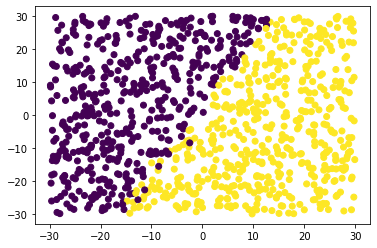

In [7]:
plt.scatter(x[:,0],x[:,1],c=y)


In [8]:
prior_mean = jnp.array([1.9,5.9,5])
prior_var = 5*jnp.identity(3)
prior_normal = tfd.MultivariateNormalFullCovariance(
    loc= prior_mean,covariance_matrix=prior_var
)
n = n+1

In [9]:
import pickle
dictionary = {
    "data":{"x":x,"y":y},
    'prior':{'loc':prior_mean,'covariance_matrix':prior_var}
    }
with open("logistic_regression_data",'wb') as f:
    pickle.dump(dictionary,f)